# SHUBH SINHA - 210968172

# Week 03 - CNN vs FCNN

In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing the tenserflow library
import tensorflow as tf

#importing keras and the layers
#keras is an API made on top of tensor flow, so that's why like this
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

### Q1) Understanding the Dataset and Pre-processing

In [2]:
df = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = df.load_data()

In [4]:
print("Number of images in the training data set :",x_train.shape[0])
print("Number of images in the testing data set :",y_test.shape[0])
print("Dimensions of each image in the data set :", x_train.shape[1], "x", x_train.shape[2])

Number of images in the training data set : 60000
Number of images in the testing data set : 10000
Dimensions of each image in the data set : 28 x 28


#### Compute and display the number of classes.

In [5]:
classes = np.unique(y_train)
print ("Number of classes :", len(classes))
print ("The classes are: ", end="")
for i in classes:
    print(i, end = " ")

Number of classes : 10
The classes are: 0 1 2 3 4 5 6 7 8 9 

#### Compute and display the dimensions of each image.

Number of images: 60000
Image dimensions: 28 x 28


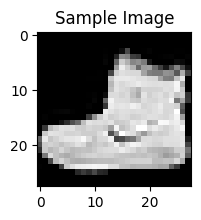

In [6]:
#number of images and their dimensions
num_images, img_height, img_width = x_train.shape[0], x_train.shape[1], x_train.shape[2]

print("Number of images:", num_images)
print("Image dimensions:", img_height, "x", img_width)

#displaying a sample image
sample_image = x_train[0]
plt.figure(figsize=(2, 2))
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Image")
plt.show()

#### Display one image from each class.

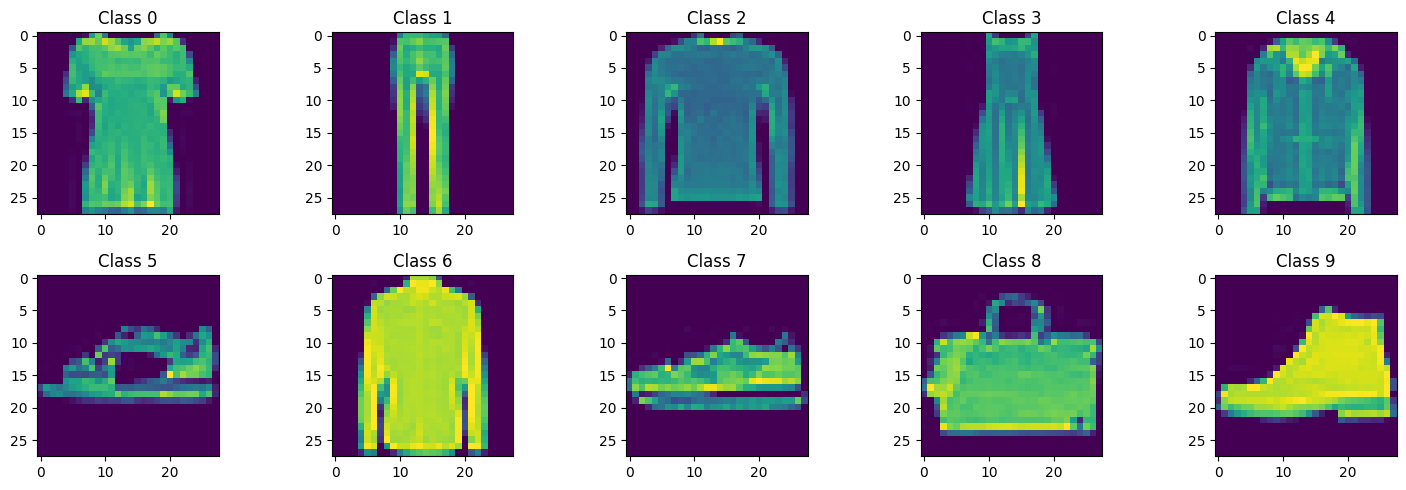

In [7]:
plt.figure(figsize=(15, 5))
for i in classes:
    ind = np.where(y_train == i)[0]
    image_idx = ind[3]  #fourth image for this class
    image = x_train[image_idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(f"Class {i}")
    plt.axis('on')

plt.tight_layout()
plt.show()

#### Perform normalization.

In [8]:
x_train = x_train/255
x_test = x_test/255

### Q2) Performing experiments on Fully Connected Neural Networks (FCNN)

#### Design a FCNN which is most suitable for the given dataset

In [9]:
#FCNN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [10]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [11]:
#model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Train and test the network

In [13]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=2)

Epoch 1/20
1500/1500 - 14s - loss: 0.5069 - accuracy: 0.8220 - val_loss: 0.4094 - val_accuracy: 0.8563 - 14s/epoch - 10ms/step
Epoch 2/20
1500/1500 - 4s - loss: 0.3739 - accuracy: 0.8619 - val_loss: 0.3877 - val_accuracy: 0.8583 - 4s/epoch - 3ms/step
Epoch 3/20
1500/1500 - 5s - loss: 0.3374 - accuracy: 0.8762 - val_loss: 0.3846 - val_accuracy: 0.8600 - 5s/epoch - 3ms/step
Epoch 4/20
1500/1500 - 6s - loss: 0.3148 - accuracy: 0.8833 - val_loss: 0.3290 - val_accuracy: 0.8823 - 6s/epoch - 4ms/step
Epoch 5/20
1500/1500 - 4s - loss: 0.2984 - accuracy: 0.8891 - val_loss: 0.3204 - val_accuracy: 0.8816 - 4s/epoch - 3ms/step
Epoch 6/20
1500/1500 - 5s - loss: 0.2822 - accuracy: 0.8938 - val_loss: 0.3318 - val_accuracy: 0.8829 - 5s/epoch - 3ms/step
Epoch 7/20
1500/1500 - 5s - loss: 0.2726 - accuracy: 0.8978 - val_loss: 0.3395 - val_accuracy: 0.8758 - 5s/epoch - 3ms/step
Epoch 8/20
1500/1500 - 4s - loss: 0.2596 - accuracy: 0.9021 - val_loss: 0.3337 - val_accuracy: 0.8820 - 4s/epoch - 3ms/step
Epoch

In [14]:
#model evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {(test_acc*100):.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.3956 - accuracy: 0.8841
Test accuracy: 88.41%


#### Plot the performance curves.

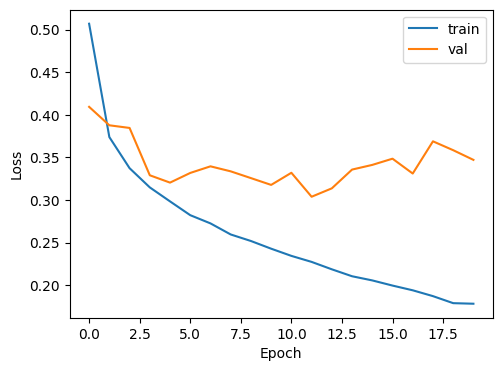

In [15]:
plt.figure(figsize=(12, 4))

#plotting the loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

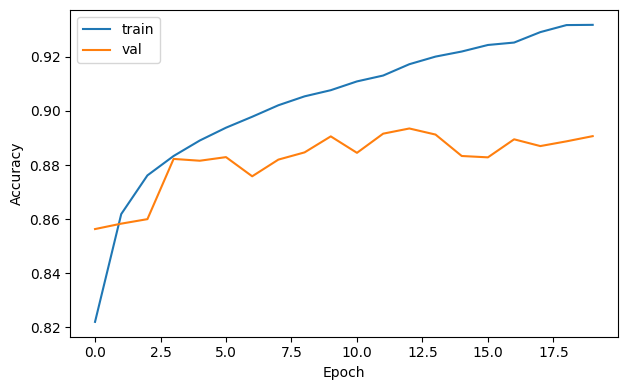

In [16]:
plt.figure(figsize=(12, 4))

#plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### Q3) Performing experiments on a Convolutional Neural Networks (CNNs)

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

### Design CNN-1 which contains: 
#### • One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0.
#### • One Pooling layer which uses MAXPOOLING with stride =2.
#### • One hidden layer having number of neurons = 100

In [18]:
model1 = Sequential([
    Conv2D(32, (5, 5), activation='relu', strides=(1, 1), padding='valid', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [19]:
#summary of the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               460900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
________________________________________________

In [20]:
#compiling the model
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [21]:
history1 = model1.fit(x_train, y_train, validation_split=0.2, epochs=40, batch_size=49, verbose=2)

Epoch 1/40
980/980 - 8s - loss: 0.4450 - accuracy: 0.8435 - val_loss: 0.3494 - val_accuracy: 0.8756 - 8s/epoch - 8ms/step
Epoch 2/40
980/980 - 4s - loss: 0.3033 - accuracy: 0.8924 - val_loss: 0.3054 - val_accuracy: 0.8882 - 4s/epoch - 4ms/step
Epoch 3/40
980/980 - 4s - loss: 0.2580 - accuracy: 0.9063 - val_loss: 0.2684 - val_accuracy: 0.9022 - 4s/epoch - 4ms/step
Epoch 4/40
980/980 - 5s - loss: 0.2252 - accuracy: 0.9174 - val_loss: 0.2559 - val_accuracy: 0.9071 - 5s/epoch - 5ms/step
Epoch 5/40
980/980 - 4s - loss: 0.2021 - accuracy: 0.9261 - val_loss: 0.2482 - val_accuracy: 0.9120 - 4s/epoch - 4ms/step
Epoch 6/40
980/980 - 5s - loss: 0.1782 - accuracy: 0.9340 - val_loss: 0.2694 - val_accuracy: 0.9042 - 5s/epoch - 5ms/step
Epoch 7/40
980/980 - 3s - loss: 0.1555 - accuracy: 0.9419 - val_loss: 0.2518 - val_accuracy: 0.9141 - 3s/epoch - 4ms/step
Epoch 8/40
980/980 - 4s - loss: 0.1402 - accuracy: 0.9489 - val_loss: 0.2518 - val_accuracy: 0.9161 - 4s/epoch - 4ms/step
Epoch 9/40
980/980 - 4s 

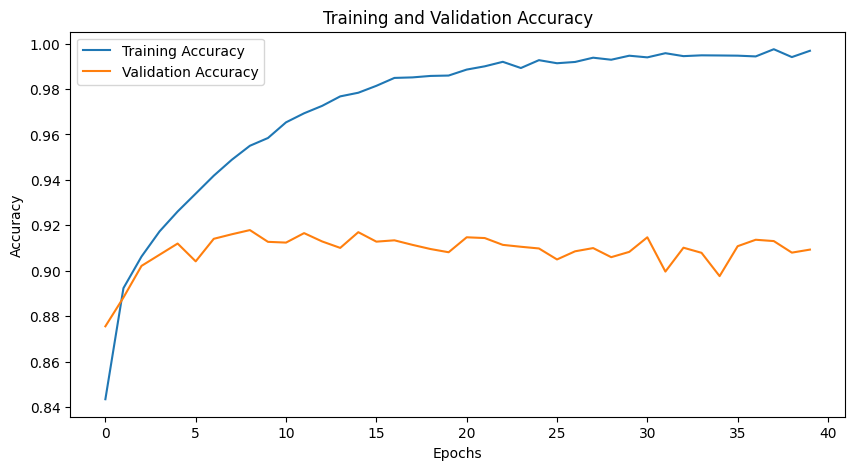

In [22]:
#training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [23]:
#model evaluation
test_loss, test_accuracy = model1.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {(test_accuracy)*100:.2f}%")

Test Loss: 0.7507
Test Accuracy: 90.57%


### Design CNN-2 which contains:
#### • Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1, and padding =0.
#### • One Pooling layer which uses MAXPOOLING with stride =2.
#### • One hidden layer having number of neurons = 100
##### Note: use ReLU activation function after each convolution layer.


In [24]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='valid', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='valid'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [25]:
#model compilation
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [26]:
history2 = model2.fit(x_train, y_train, validation_split=0.2, epochs=40, batch_size=49, verbose=2)

Epoch 1/40
980/980 - 7s - loss: 0.4352 - accuracy: 0.8457 - val_loss: 0.3514 - val_accuracy: 0.8722 - 7s/epoch - 7ms/step
Epoch 2/40
980/980 - 4s - loss: 0.2823 - accuracy: 0.8992 - val_loss: 0.2655 - val_accuracy: 0.9015 - 4s/epoch - 4ms/step
Epoch 3/40
980/980 - 4s - loss: 0.2292 - accuracy: 0.9158 - val_loss: 0.2585 - val_accuracy: 0.9077 - 4s/epoch - 4ms/step
Epoch 4/40
980/980 - 5s - loss: 0.1914 - accuracy: 0.9304 - val_loss: 0.2297 - val_accuracy: 0.9160 - 5s/epoch - 5ms/step
Epoch 5/40
980/980 - 4s - loss: 0.1600 - accuracy: 0.9405 - val_loss: 0.2311 - val_accuracy: 0.9184 - 4s/epoch - 4ms/step
Epoch 6/40
980/980 - 4s - loss: 0.1307 - accuracy: 0.9519 - val_loss: 0.2629 - val_accuracy: 0.9146 - 4s/epoch - 4ms/step
Epoch 7/40
980/980 - 5s - loss: 0.1065 - accuracy: 0.9606 - val_loss: 0.2606 - val_accuracy: 0.9138 - 5s/epoch - 5ms/step
Epoch 8/40
980/980 - 4s - loss: 0.0862 - accuracy: 0.9686 - val_loss: 0.2722 - val_accuracy: 0.9161 - 4s/epoch - 4ms/step
Epoch 9/40
980/980 - 4s 

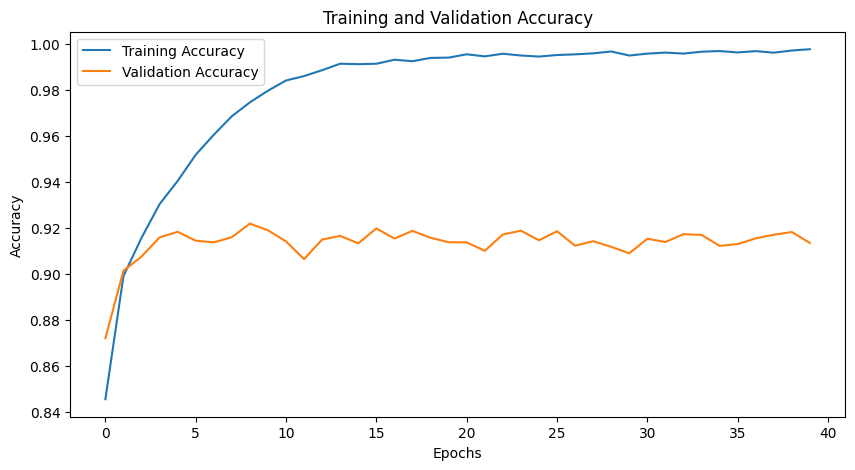

In [27]:
#training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [28]:
#model evaluation
test_loss, test_accuracy = model2.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Loss: 0.8529
Test Accuracy: 90.92%


#### Plot the performance curves for CNN-1 and CNN-2.

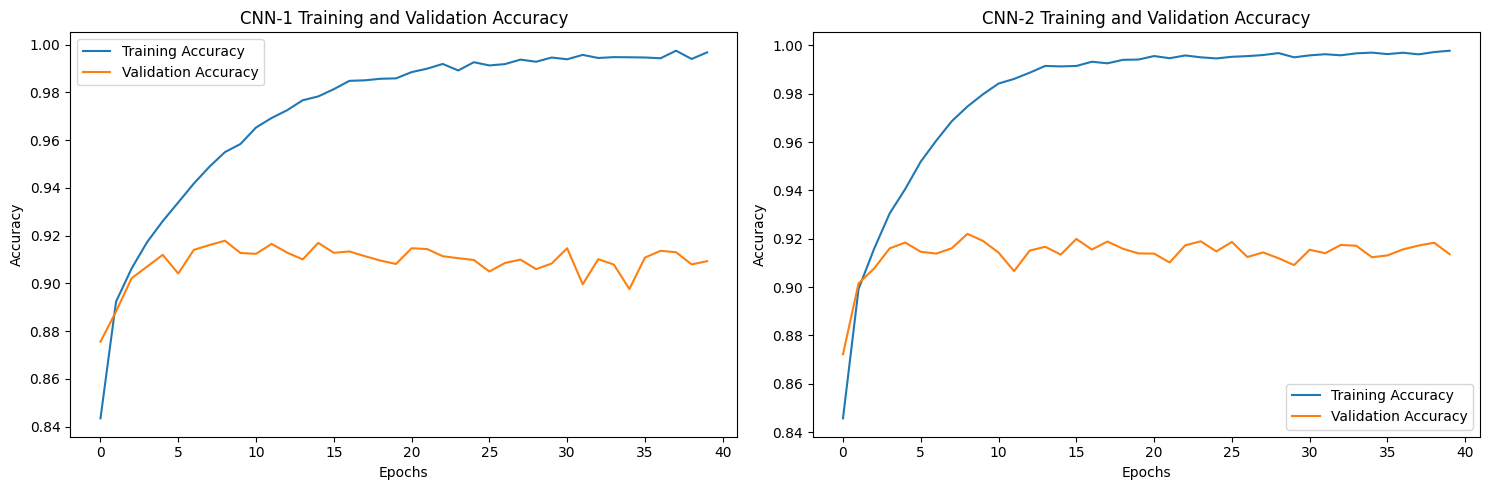

In [29]:
#plotting training and validation accuracy over epochs for both models
plt.figure(figsize=(15, 5))

#CNN-1
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN-1 Training and Validation Accuracy')
plt.legend()

#CNN-2
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN-2 Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Compare the performances of CNN-1 and CNN-2.

In [30]:
#evaluation of both of the models
test_loss1, test_accuracy1 = model1.evaluate(x_test, y_test, verbose=0)
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test, verbose=0)

print("CNN-1 Test Accuracy: ", test_accuracy1*100,'%', sep="")
print("CNN-2 Test Accuracy: ", test_accuracy2*100,'%', sep="")

CNN-1 Test Accuracy: 90.57000279426575%
CNN-2 Test Accuracy: 90.92000126838684%


### Q4) Compare the performances of FCNN and CNN.

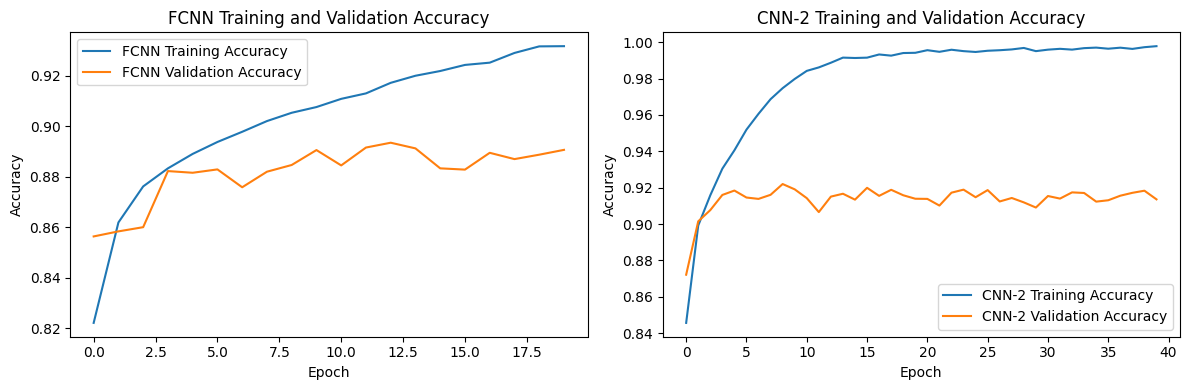

In [31]:
plt.figure(figsize=(12, 4))

#FCNN
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='FCNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='FCNN Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('FCNN Training and Validation Accuracy')
plt.legend()

#CNN-2
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='CNN-2 Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='CNN-2 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN-2 Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
#models evaluation
fcnn_test_loss, fcnn_test_acc = model.evaluate(x_test, y_test)
cnn_test_loss, cnn_test_acc = model2.evaluate(x_test, y_test)

print("FCNN Test Accuracy:", fcnn_test_acc)
print("CNN-2 Test Accuracy:", cnn_test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8529 - accuracy: 0.9092
FCNN Test Accuracy: 0.8841000199317932
CNN-2 Test Accuracy: 0.9092000126838684


### Q5) Compare the number of parameters in the FCNN and the CNN.

In [33]:
#model summaries to compare parameter counts
print("FCNN Model Summary:")
model.summary()

print("\nCNN-1 Model Summary:")
model1.summary()

print("\nCNN-2 Model Summary:")
model2.summary()

FCNN Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________

CNN-1 Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape           

### Q6) Discuss the computational efficiency of both networks. 

In [34]:
import time

In [36]:
#training time - FCNN
startTime = time.time()
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=2)
fcnnTrainingTime = time.time() - startTime
print(f"FCNN Training Time: {fcnnTrainingTime:.2f} seconds")

#training time - CNN-2
startTime = time.time()
model2.fit(x_train, y_train, epochs=5, batch_size=64, verbose=2)
cnnTrainingTime = time.time() - startTime
print(f"CNN Training Time: {cnnTrainingTime:.2f} seconds")

Epoch 1/5
938/938 - 3s - loss: 0.1584 - accuracy: 0.9403 - 3s/epoch - 4ms/step
Epoch 2/5
938/938 - 3s - loss: 0.1526 - accuracy: 0.9430 - 3s/epoch - 3ms/step
Epoch 3/5
938/938 - 3s - loss: 0.1479 - accuracy: 0.9452 - 3s/epoch - 3ms/step
Epoch 4/5
938/938 - 3s - loss: 0.1437 - accuracy: 0.9448 - 3s/epoch - 3ms/step
Epoch 5/5
938/938 - 3s - loss: 0.1413 - accuracy: 0.9463 - 3s/epoch - 3ms/step
FCNN Training Time: 14.65 seconds
Epoch 1/5
938/938 - 3s - loss: 0.0114 - accuracy: 0.9959 - 3s/epoch - 4ms/step
Epoch 2/5
938/938 - 3s - loss: 0.0094 - accuracy: 0.9971 - 3s/epoch - 4ms/step
Epoch 3/5
938/938 - 3s - loss: 0.0070 - accuracy: 0.9977 - 3s/epoch - 4ms/step
Epoch 4/5
938/938 - 4s - loss: 0.0066 - accuracy: 0.9979 - 4s/epoch - 4ms/step
Epoch 5/5
938/938 - 3s - loss: 0.0076 - accuracy: 0.9973 - 3s/epoch - 4ms/step
CNN Training Time: 17.89 seconds


In [2]:
#CNN training time > FCNN training time, 
#as the parameters are more in CNN, more layers and requires more computation than FCNN, 
#thus takes longer training time, 
#and CNN is faster.